uncomment de volgende lijn om streamlit te installeren

In [100]:
!pip install streamlit kaggle

In [101]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as pe
import plotly.express as px
from sklearn.linear_model import LinearRegression

In [102]:
import kaggle
import zipfile
import os

api = kaggle.api
datasets = api.datasets_list(search='Airplane Crashes and Fatalities')
ref = datasets[0]['ref']

kaggle.api.dataset_download_files(ref,path='data')

files = os.listdir("data")
for file in files:
    if ".zip" in file:
        with zipfile.ZipFile(f"data/{file}","r") as zip_ref:
            zip_ref.extractall("data")


api = kaggle.api
datasets = api.datasets_list(search='Air Traffic Passenger Statistics')
ref = datasets[0]['ref']

kaggle.api.dataset_download_files(ref,path='data')

files = os.listdir("data")
for file in files:
    if ".zip" in file:
        with zipfile.ZipFile(f"data/{file}","r") as zip_ref:
            zip_ref.extractall("data")
            


In [103]:
Air_Traffic = pd.read_csv("data/Air_Traffic_Passenger_Statistics.csv")

In [104]:
Air_Traffic.head(30)

,index,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
5,5,200507,Air China,CA,Air China,CA,International,Asia,Deplaned,Other,International,G,6263,Deplaned,6263,2005,July
6,6,200507,Air China,CA,Air China,CA,International,Asia,Enplaned,Other,International,G,5500,Enplaned,5500,2005,July
7,7,200507,Air France,AF,Air France,AF,International,Europe,Deplaned,Other,International,A,12050,Deplaned,12050,2005,July
8,8,200507,Air France,AF,Air France,AF,International,Europe,Enplaned,Other,International,A,11638,Enplaned,11638,2005,July
9,9,200507,Air New Zealand,NZ,Air New Zealand,NZ,International,Australia / Oceania,Deplaned,Other,International,G,4998,Deplaned,4998,2005,July


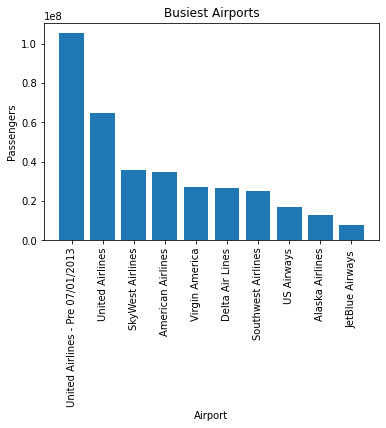

In [105]:
busiest_airports = Air_Traffic.groupby('Operating Airline').sum()['Passenger Count'].sort_values(ascending=False)[:10]

plt.bar(busiest_airports.index, busiest_airports.values)
plt.xticks(rotation=90)
plt.xlabel('Airport')
plt.ylabel('Passengers')
plt.title('Busiest Airports')
plt.show()

In [121]:
Prijs = Air_Traffic['Price Category Code']
print(Prijs)

0        Low Fare
1        Low Fare
2        Low Fare
3           Other
4           Other
           ...   
15002    Low Fare
15003    Low Fare
15004    Low Fare
15005       Other
15006       Other
Name: Price Category Code, Length: 15007, dtype: object


In [122]:
Air_Traffic['Price Category Code'].replace(['Low Fare', 'Other'], [1, 2], inplace=True)


In [123]:
Air_Traffic.head()

,index,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,1,Terminal 1,B,27271,Deplaned,27271,2005,July
1,1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,1,Terminal 1,B,29131,Enplaned,29131,2005,July
2,2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,1,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,2,Terminal 1,B,35156,Deplaned,35156,2005,July
4,4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,2,Terminal 1,B,34090,Enplaned,34090,2005,July


In [107]:
fig = px.bar(Air_Traffic, x='GEO Summary', y='Passenger Count')
fig.show()

In [108]:
Flights = Air_Traffic.groupby('GEO Summary').sum()['Passenger Count']

In [150]:
fig = px.scatter(
    Air_Traffic, x='Year', y='Passenger Count', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue'
)
fig.show()

In [168]:
#print(Air_Traffic[['Year','Passenger Count']])
#print(Air_Traffic.head())
#print( Air_Traffic[['Passenger Count','Year','Price Category Code']])


X = Air_Traffic[['Passenger Count', 'Year', 'Price Category Code']].values.reshape(-1, 1)
model = LinearRegression()
model.fit(X)

x_range = np.linspace(X.min(), X.max(), 100)
y_range = model.predict(x_range.reshape(-1, 1))

fig = px.scatter(Air_Traffic, x='Passenger Count', y='Year', opacity=0.50)
fig.add_traces(go.Scatter(x=x_range, y=y_range, name='Regression Fit'))
fig.show()

TypeError: fit() missing 1 required positional argument: 'y'

In [166]:


X = Air_Traffic[["Year", "Price Category Code"]]
y = Air_Traffic["Passenger Count"].values.reshape(-1, 1)


X = pd.get_dummies(X, columns=["Price Category Code"])

regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)

fig, ax = plt.subplots()
colors = np.where(Air_Traffic["Price Category Code"] == 1, "blue", "red")
ax.scatter(Air_Traffic["Year"], Air_Traffic["Passenger Count"], color=colors, alpha=0.5)
ax.plot(Air_Traffic["Year"], y_pred, color="green")

ax.set_xlabel("Year")
ax.set_ylabel("Passenger Count")
ax.set_title("Air Traffic Passenger Statistics")

plt.show()


In [ ]:
import plotly.express as px
fig = px.box(Air_Traffic, x='GEO Region', y='Passenger Count', color='GEO Region')
fig.show()

In [ ]:
domestic_traffic = Air_Traffic[Air_Traffic['GEO Summary'] == 'Domestic']
domestic_traffic.head()


,index,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
11,11,200507,AirTran Airways,FL,AirTran Airways,FL,Domestic,US,Deplaned,Low Fare,International,A,8055,Deplaned,8055,2005,July
12,12,200507,AirTran Airways,FL,AirTran Airways,FL,Domestic,US,Enplaned,Low Fare,International,A,7984,Enplaned,7984,2005,July


In [ ]:
#!streamlit run case_2.py

^C


In [ ]:
acf_df = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv")
acf_df.head()

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [ ]:


def extract_decade(date):
    return round(int(date.split('/')[2])/10)*10

hist_df = acf_df
hist_df['year'] = hist_df['Date'].apply(extract_decade)

pe.histogram(acf_df,x='year')

In [ ]:
import json

acf_df.head()

words = {}

ignore_words = """
the
a
and
to
of
in
crashed
into
was
aircraft
plane
after
while
not
for 
off
en
on
at
by 
from
"""

for summary in acf_df['Summary'].dropna():
    try:
        sum_words = summary.split()
    
        for word in sum_words:
            word = word.lower()
            if word in ignore_words:
                continue
            if word in words:
                words[word] += 1
            else:
                words[word] = 0
    except:
        print(summary)

sorted_words = sorted(words,key=words.get,reverse=True)
sorted_counts = sorted(words.values(),reverse=True)



words = pd.DataFrame({'words':sorted_words,'counts':sorted_counts})
words.head(40)

,words,counts
0,pilot,935
1,flight,864
2,with,817
3,engine,784
4,during,782
5,failure,750
6,crew,693
7,approach,613
8,which,571
9,landing,567
